<a href="https://colab.research.google.com/github/StratosFair/DNN_Classifiers_Fast_Rates/blob/main/stl10_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Install PyTorch if not already installed
!pip install torch torchvision

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import STL10
from torchvision.transforms import ToTensor

In [ ]:
# Download STL-10 dataset
dataset = STL10(root='./data', split='train', download=True, transform=ToTensor())

# STL-10 Classes
stl10_classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

In [18]:
# Filter airplane (class 0) and ship (class 8) images
airplane_images = [data.transpose(1, 2, 0) for data, label in zip(dataset.data, dataset.labels) if label == 0]
ship_images = [data.transpose(1, 2, 0) for data, label in zip(dataset.data, dataset.labels) if label == 8]

print(f"Number of airplane images: {len(airplane_images)}")
print(f"Number of ship images: {len(ship_images)}")

Number of airplane images: 500
Number of ship images: 500


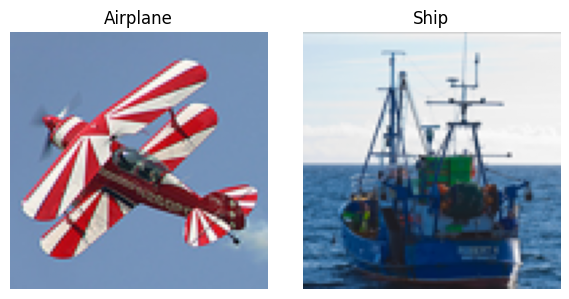

In [19]:
# Randomly select one image from each class
np.random.seed(42)  # For reproducibility
image_a = airplane_images[np.random.randint(len(airplane_images))]
image_b = ship_images[np.random.randint(len(ship_images))]

# Normalize images to [0, 1] range
image_a = image_a / 255.0
image_b = image_b / 255.0

# Display the selected images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(image_a)
plt.title("Airplane")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_b)
plt.title("Ship")
plt.axis("off")

plt.tight_layout()
plt.show()

In [20]:
# Interpolation function
def interpolate_images(image1, image2, alpha=0.5):
    """
    Interpolate between two images using the formula:
    interpolated_image = (1 - alpha) * image1 + alpha * image2
    """
    return (1 - alpha) * image1 + alpha * image2

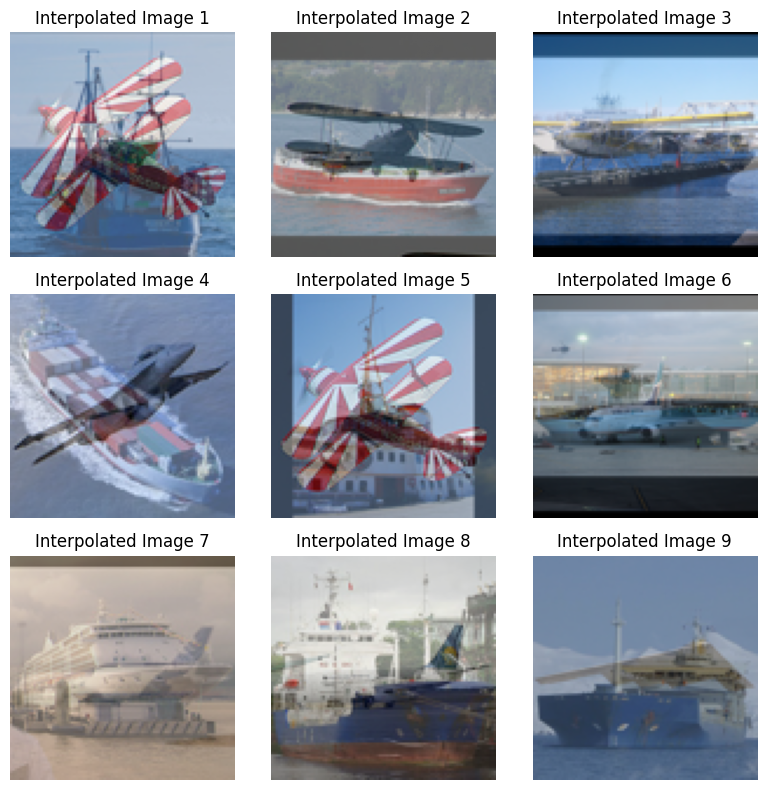

In [21]:
# Generate 9 random pairs of images for interpolation
np.random.seed(42)  # For reproducibility
pairs = [
    (airplane_images[np.random.randint(len(airplane_images))],
     ship_images[np.random.randint(len(ship_images))]) for _ in range(9)
]

# Normalize the selected images to [0, 1]
pairs = [(pair[0] / 255.0, pair[1] / 255.0) for pair in pairs]

# Interpolate each pair with alpha=0.5
interpolated_images = [interpolate_images(pair[0], pair[1], alpha=0.5) for pair in pairs]

# Plot the interpolated images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i, interpolated_image in enumerate(interpolated_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(interpolated_image)
    plt.title(f"Interpolated Image {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()